# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print()
print('State 2:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]

State 2: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    
    steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        
        steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
  
    print(f'steps: {steps} average: {np.mean(scores):.4f}')
    
    if i == 4:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        print(f'actions: {actions}')
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
 
        print(f'actions: {actions}')
        print(next_states)
        print(f'rewards: {rewards}')
        print(f'dones: {dones}')
        
        

steps: 16 average: -0.0050
steps: 14 average: -0.0050
steps: 14 average: -0.0050
steps: 15 average: -0.0050
steps: 14 average: -0.0050
actions: [[ 0.88185552 -0.32364546]
 [ 1.2814546  -0.57149371]]
actions: [[ 0.88185552 -0.32364546]
 [ 1.         -0.57149371]]
[[  0.           0.           0.           0.           0.           0.
    0.           0.          -6.14030886  -1.5         -0.           0.
   -7.11741829   5.97645617  -0.           0.          -3.49474263
   -1.55886006  26.45566559  -0.98100001  -7.11741829   5.85873604
   26.45566559  -0.98100001]
 [  0.           0.           0.           0.           0.           0.
    0.           0.          -7.9574213   -1.5          0.           0.
    7.11741829   5.97645617   0.           0.          -4.9574213
   -1.55886006  30.          -0.98100001   7.11741829   5.85873604  30.
   -0.98100001]]
rewards: [0.0, 0.0]
dones: [False, False]


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import random
import time
import copy
import matplotlib.pyplot as plt
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline

In [7]:
def plot_score(scores, averages, target=0.5, title='Rewards'):
    size = len(scores)
    
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    ax.set_title(title)
    plt.plot(np.arange(size), scores, label='scores')
    plt.plot(np.arange(size), averages, label='average')
    plt.plot([target] * size, linestyle='--', color='Red', linewidth=1)
    
    plt.text(0, target, 'Target', color='Red', fontsize='large')
    plt.ylabel('Score')
    plt.xlabel('Episodes')
    plt.legend(fontsize='xx-large', loc='upper left');
    plt.show()


In [8]:
TARGET_SCORE = 0.5      # score to acheive
TARGET_EPISODES = 100   # episodes needed to acheive average score

BUFFER_SIZE = int(5e4)  # replay buffer size 1e5
BATCH_SIZE = 128        # minibatch size / 256

GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic #5e-3  
WEIGHT_DECAY = 0        # L2 weight decay
EPSILON = 2.0           # explore->exploit noise process added to act step
EPSILON_DECAY = 0.999   # decay rate for noise process 0.999
EPSILON_END = 0.0001     # minumum noise 0.05

THETA=0.2
SIGMA=0.2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'Device: {device}')

Device: cuda:0


In [9]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=THETA, sigma=SIGMA):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size, seed): #action_size, 
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        # self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = seed # random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
        
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [10]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed=1, fc1_units=128, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed=1, fcs1_units=128, fc2_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear((state_size+action_size), fcs1_units)
        self.fc2 = nn.Linear(fcs1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = torch.cat((state, action), dim=1)
        x = F.relu(self.fcs1(xs))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [11]:
class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, memory=None, random_seed=1):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        # Noise process
        self.noise = OUNoise(action_size, random_seed)
        
        # Replay memory
        if memory == None:
            print('new memory')
            self.memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, random_seed)
        else:
            self.memory = memory
            
        self.epsilon = EPSILON
        self.epsilon_decay = EPSILON_DECAY
        self.epsilon_end = EPSILON_END
    
    def save_checkpoint(self, name='checkpoint'):
        torch.save(self.actor_local.state_dict(), f'actor_path_{name}.pth')
        torch.save(self.critic_local.state_dict(), f'critic_path_{name}.pth')
    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        # print(state)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.epsilon * self.noise.sample()
            self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


    
class MultiAgent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, num_agents, state_size, action_size, random_seed=1):
        """Initialize an Agent object.
        
        Params
        ======
            num_agents (int): number of agents
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.num_agents = num_agents
        self.action_size = action_size
        self.agents = []
        
        self.epsilon = 0
        self.learning_i = 0
        
        self.memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, random_seed)
        
        for _ in range(num_agents):
            self.agents.append(Agent(state_size, action_size, self.memory, random_seed))
    
    def save_checkpoint(self, name='checkpoint'):
        for index, agent in enumerate(self.agents):
            agent.save_checkpoint(f'{name}_{index}') 

    def act_random(self):
        actions = np.random.randn(self.num_agents, self.action_size)
        return np.clip(actions, -1, 1)  
    
    def remember(self, states, actions, rewards, next_states, dones, reward=False):
        for i, agent in enumerate(self.agents):
            if reward == False or reward and rewards[i] != 0:
                self.memory.add(states[i], actions[i], rewards[i], next_states[i], dones[i])
        
    def step(self, states, actions, rewards, next_states, dones, reward=False):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        #for i, agent in enumerate(self.agents):
            #self.memory.add(states[i], actions, rewards, next_states, dones)
        
        self.remember(states, actions, rewards, next_states, dones, reward)
        self.learn()

    def learn(self):
        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            self.learning_i += 1
            
            for agent in self.agents:
                experiences = self.memory.sample()
                agent.learn(experiences, GAMMA)
                
    def act(self, states, add_noise=True):
        actions = [] # np.zeros([num_agents, action_size]) #[]
        epsilon = []
        
        for i, agent in enumerate(self.agents):
            actions.append(agent.act(states[i], add_noise))
            epsilon.append(agent.epsilon)
            
        self.epsilon = np.mean(epsilon)
        
        return actions

    def reset(self):
        for agent in self.agents:
            agent.reset()


In [12]:
def reset():
    agent.reset()
    env_info = env.reset(train_mode=True)[brain_name]     
    states = env_info.vector_observations               
    score = np.zeros(num_agents)
    
    return states, score, []

# used for filling memory and testing training
def fill(max_episodes=750, max_percent=10, train=False, reward=True):
    print(f'Filling')
    print(f'max_episodes:{max_episodes} | max_percent:{max_percent:.2f}%')
    print(f'training={train} | reward={reward}')
    print(f'Episode\tMem Len\tMem %\tLearning')
    
    for e_i in range(1, max_episodes+1):
        states, score, temp = reset()
        
        while True:
            actions = agent.act_random()  
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished

            score += rewards# np.max(rewards)
            
            if train:
                agent.step(states, actions, rewards, next_states, dones, reward)
            else:
                agent.remember(states, actions, rewards, next_states, dones, reward)

            states = next_states
            
            if np.any(dones):
                break
        
        percent = (len(agent.memory)/BUFFER_SIZE)*100
        print(f'\r{e_i}\t{len(agent.memory)}\t{percent:.2f}%\t{agent.learning_i}', end="")
        if percent >= max_percent or e_i > max_episodes:
            break

In [13]:
def print_info(e_i, durations, scores, moving_avg, steps, print_i=50):
    if e_i == 1:
        print(f'A = Average | B = Best')
        print(f'Episode\tA-Steps\tMean\tMoving\tB-Score\tB-Steps\tEpsilon\tLearn\tMem %\tDuration')
        
    remainder = e_i % print_i
    
    step = np.mean(steps[-print_i:])
    mean = np.mean(scores[-print_i:])
    moving = moving_avg[-1]
    best_score = np.max(scores[-print_i:])
    best_steps = np.max(steps[-print_i:])
    mem = (len(agent.memory)/BUFFER_SIZE)*100
    
    avg = f'{step:.0f}\t{mean:.3f}\t{moving:.3f}' 
    best = f'{best_score:.3f}\t{best_steps:.0f}'
    agent_info = f'{agent.epsilon:.4f}\t{agent.learning_i}\t{mem:.2f}%'
      
    #'Episode\tSteps\tMean\tMoving\tScore\tSteps\tEpsilon\tLearn\tDuration'
    info = f'\r{e_i}\t{avg}\t{best}\t{agent_info}'
    
    solved = (moving >= TARGET_SCORE)
    
    if remainder == 0:
        print(f'\r{info}\t{np.sum(durations[-print_i:])/60:.2f}')            
    else:
        print(f'\r{info}\t{np.sum(durations[-remainder:])/60:.2f}', end="")
        
    if solved:
        print(f'\nSolved')                
        print(f'\n{info}\t{np.sum(durations)/60:.2f}')
                        
    return solved

def train(max_episodes=250, max_steps=2500, random_episodes=100, add_noise=True):
    scores_window = deque(maxlen=TARGET_EPISODES)
    scores = []
    moving_avgs = []
    steps = []
    start_time = time.time()
    durations = []
    
    print(f'Training')
    print(f'max_episodes:{max_episodes} | max_steps:{max_steps} | random_episodes:{random_episodes}')
    
    for e_i in range(1, max_episodes+1):
        states, score, temp = reset()
        
        for s_i in range(max_steps):
            if e_i <= random_episodes:
                actions = agent.act_random() # select an action     
            else:
                actions = agent.act(states, add_noise=add_noise) # select an action
                
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
 
            agent.step(states, actions, rewards, next_states, dones)

            states = next_states
            score += rewards# np.max(rewards)
            
            if np.any(dones):
                steps.append(s_i)
                break
        
        end_time = time.time()
        durations.append((end_time - start_time))
        start_time = end_time
        score_max = np.max(score)                 
        scores.append(score_max)             
        scores_window.append(score_max)            
        moving_avgs.append(np.mean(scores_window))  
            
        if print_info(e_i, durations, scores, moving_avgs, steps):
            agent.save_checkpoint(name='solved')
            break
        
    return scores, moving_avgs                      
                        

In [14]:
agent = MultiAgent(num_agents, state_size=state_size, action_size=action_size, random_seed=1)

In [15]:
# scores, averages = train(max_episodes=250, max_steps=100) 
# fill(max_percent=1, train=True)

Training
max_episodes:1500 | max_steps:2500 | random_episodes:250
A = Average | B = Best
Episode	A-Steps	Mean	Moving	B-Score	B-Steps	Epsilon	Learn	Mem %	Duration
50	17	0.013	0.013	0.100	41	0.0000	820	3.54%	0.27
100	17	0.017	0.015	0.100	32	0.0000	1714	7.11%	0.28
150	18	0.023	0.020	0.100	65	0.0000	2663	10.91%	0.30
200	17	0.023	0.023	0.100	53	0.0000	3583	14.59%	0.29
250	18	0.018	0.020	0.100	55	0.0000	4517	18.32%	0.30
300	13	0.000	0.009	0.000	15	0.9810	5229	21.17%	0.24
350	15	0.012	0.006	0.100	31	0.4319	6049	24.45%	0.28
400	19	0.036	0.024	0.100	30	0.1558	7068	28.53%	0.34
450	27	0.059	0.048	0.300	113	0.0379	8480	34.18%	0.47
500	34	0.084	0.072	0.200	91	0.0065	10242	41.22%	0.59
550	73	0.190	0.137	1.500	585	0.0002	13956	56.08%	1.26
600	74	0.199	0.195	0.800	327	0.0001	17698	71.05%	1.25
646	309	0.796	0.506	2.600	1000	0.0001	32840	100.00%	5.18
Solved

646	309	0.796	0.506	2.600	1000	0.0001	32840	100.00%	11.04


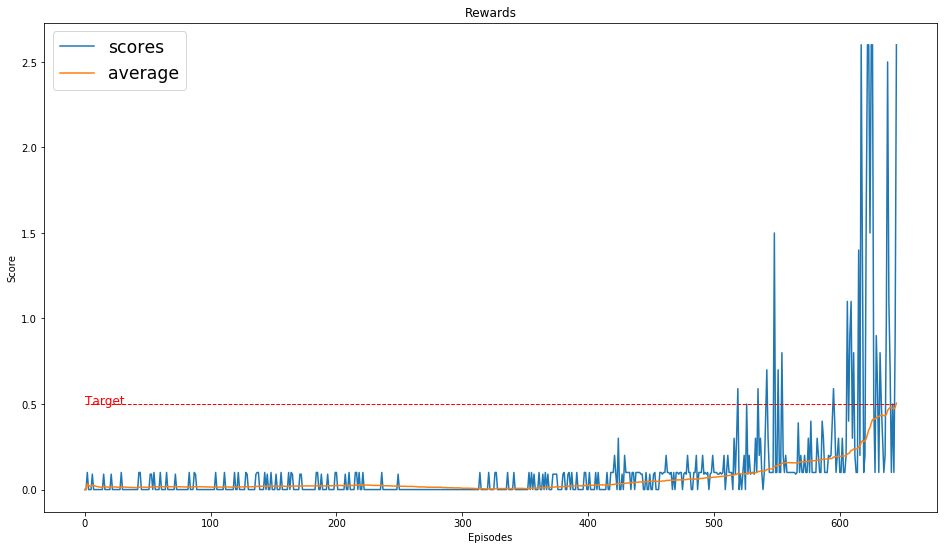

In [16]:
scores, averages = train(max_episodes=1500, random_episodes=250, add_noise=True) # 1500, 250
plot_score(scores, averages, TARGET_SCORE)

Training
max_episodes:2500 | max_steps:2500 | random_episodes:0
A = Average | B = Best
Episode	A-Steps	Mean	Moving	B-Score	B-Steps	Epsilon	Learn	Mem %	Duration
50	14	0.002	0.002	0.090	42	3.4551	675	2.96%	0.22
100	13	0.000	0.001	0.000	14	2.4224	1385	5.80%	0.23
150	15	0.008	0.004	0.100	32	1.6309	2176	8.96%	0.25
200	14	0.002	0.005	0.100	30	1.1332	2904	11.87%	0.23
250	13	0.000	0.001	0.000	17	0.7925	3619	14.73%	0.23
300	13	0.000	0.000	0.000	19	0.5521	4342	17.62%	0.23
350	13	0.000	0.000	0.000	14	0.3870	5052	20.46%	0.23
400	13	0.000	0.000	0.000	14	0.2714	5762	23.30%	0.23
450	14	0.004	0.002	0.100	47	0.1842	6537	26.40%	0.25
500	16	0.014	0.009	0.100	46	0.1205	7385	29.80%	0.28
550	20	0.033	0.023	0.100	50	0.0720	8416	33.92%	0.34
600	18	0.023	0.028	0.100	54	0.0450	9354	37.67%	0.31
650	16	0.015	0.019	0.100	32	0.0295	10201	41.06%	0.28
700	14	0.006	0.010	0.100	30	0.0201	10966	44.12%	0.25
750	20	0.038	0.022	0.100	31	0.0119	12020	48.34%	0.35
800	25	0.051	0.045	0.200	70	0.0063	13296	53.44%	0.42
850	32	0.

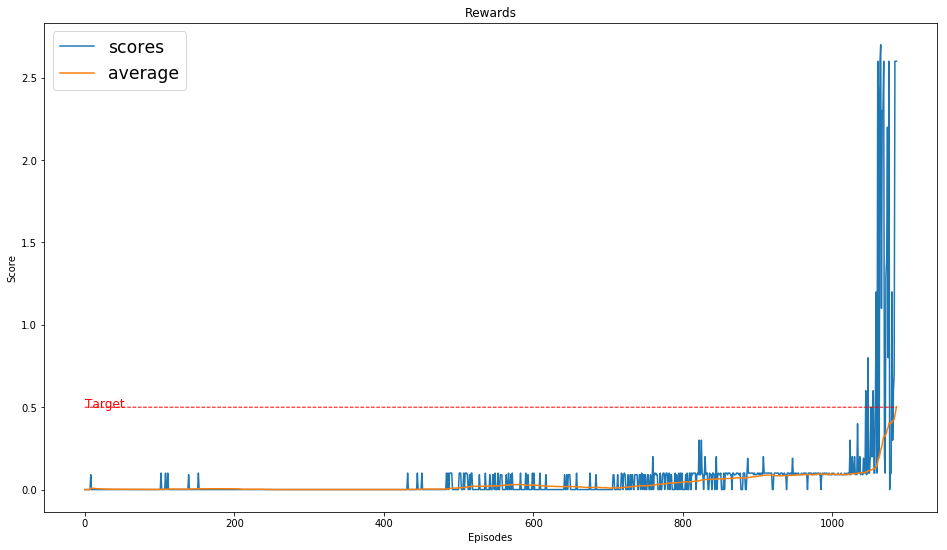

In [19]:
EPSILON = 5.0           # explore->exploit noise process added to act step
EPSILON_DECAY = 0.9995   # decay rate for noise process 0.999

agent = MultiAgent(num_agents, state_size=state_size, action_size=action_size, random_seed=1)
scores, averages = train(max_episodes=1500, random_episodes=0, add_noise=True)
plot_score(scores, averages, TARGET_SCORE)

Training
max_episodes:2500 | max_steps:2500 | random_episodes:0
A = Average | B = Best
Episode	A-Steps	Mean	Moving	B-Score	B-Steps	Epsilon	Learn	Mem %	Duration
50	13	0.002	0.002	0.090	21	4.8804	589	14.34%	0.25
100	13	0.000	0.001	0.000	14	2.3986	1299	28.54%	0.29
150	15	0.010	0.005	0.100	30	1.0860	2091	44.38%	0.32
200	13	0.002	0.006	0.100	31	0.5279	2812	58.80%	0.30
250	13	0.000	0.001	0.000	31	0.2571	3531	73.18%	0.29
300	13	0.000	0.000	0.000	16	0.1250	4252	87.60%	0.30
350	14	0.006	0.003	0.100	30	0.0588	5006	100.00%	0.31
400	13	0.000	0.003	0.000	15	0.0288	5720	100.00%	0.29
450	18	0.025	0.012	0.100	43	0.0113	6658	100.00%	0.39
500	19	0.026	0.026	0.190	66	0.0042	7648	100.00%	0.41
550	19	0.032	0.029	0.100	36	0.0015	8666	100.00%	0.42
600	20	0.037	0.035	0.100	37	0.0005	9728	100.00%	0.44
650	23	0.047	0.042	0.100	45	0.0002	10917	100.00%	0.49
700	23	0.053	0.050	0.100	52	0.0000	12140	100.00%	0.50
750	31	0.094	0.074	0.200	69	0.0000	13740	100.00%	0.65
800	32	0.099	0.097	0.100	52	0.0000	15387	100.00%	0

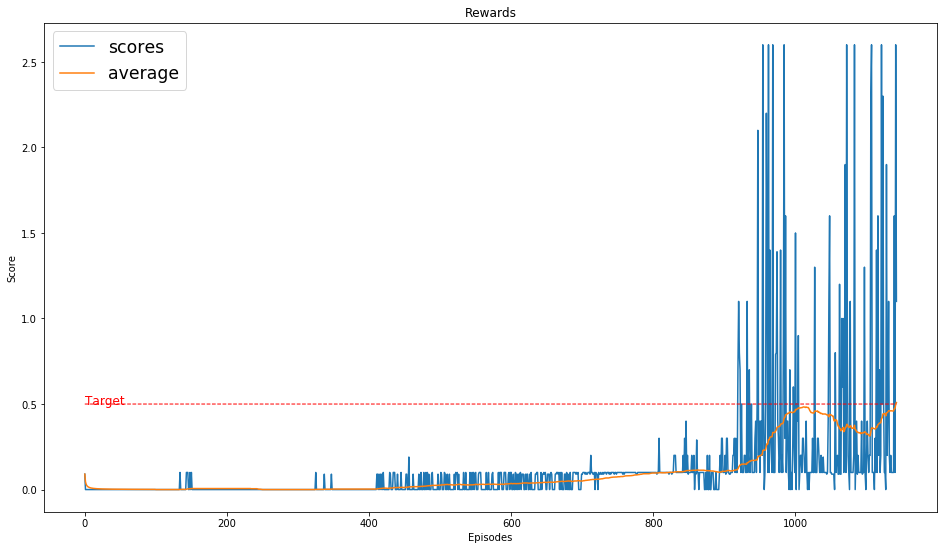

In [20]:
EPSILON = 10           # explore->exploit noise process added to act step
EPSILON_DECAY = 0.999   # decay rate for noise process 0.999
EPSILON_END = 0.00001     # minumum noise 0.05
BUFFER_SIZE = int(1e4)  # replay buffer size 1e5
BATCH_SIZE = 256        # minibatch size / 256

agent = MultiAgent(num_agents, state_size=state_size, action_size=action_size, random_seed=1)
scores, averages = train(max_episodes=1500, random_episodes=0, add_noise=True)
plot_score(scores, averages, TARGET_SCORE)

In [21]:
env.close()